In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [19]:
data = pd.read_csv('xinguan.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449820 entries, 0 to 449819
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   _id              449820 non-null  int64 
 1   mblogid          449820 non-null  object
 2   created_at       449820 non-null  object
 3   geo              29764 non-null   object
 4   ip_location      48509 non-null   object
 5   reposts_count    449820 non-null  int64 
 6   comments_count   449820 non-null  int64 
 7   attitudes_count  449820 non-null  int64 
 8   source           429774 non-null  object
 9   content          449820 non-null  object
 10  pic_urls         449820 non-null  object
 11  pic_num          449820 non-null  int64 
 12  isLongText       449820 non-null  bool  
 13  user             449820 non-null  object
 14  url              449820 non-null  object
 15  video            64473 non-null   object
 16  created_date     449820 non-null  object
 17  created_ti

In [21]:
# change the data type of the date column
data['created_at'] = pd.to_datetime(data['created_at'])
# clear ouliers where entries are less than 2020
data = data[data['created_at'].dt.year >= 2020]

In [22]:
# Extract the week number
data['week'] = data['created_at'].dt.isocalendar().week
data['year'] = data['created_at'].dt.isocalendar().year

In [23]:
data.head()

,_id,mblogid,created_at,geo,ip_location,reposts_count,comments_count,attitudes_count,source,content,pic_urls,pic_num,isLongText,user,url,video,created_date,created_time,week,year
0,4847453260483955,MjUtw21TJ,2022-12-16 23:59:40,NaN,发布于 山东,0,0,0,HarmonyOS设备,新冠最恐怖的是二次甚至三次感染，各种后遗症使得本来就在减少的劳动力雪上加霜。\n\n文明的发...,[],0,True,"{'_id': '5491192005', 'avatar_hd': 'https://tv...",https://weibo.com/5491192005/MjUtw21TJ,NaN,2022-12-16,23:59:40,50,2022
1,4847437438518700,MjU3ZzK6o,2022-12-16 22:56:49,NaN,发布于 北京,0,11,14,iPhone,尼玛 刚退烧就来月经啊[可爱]也没说新冠后遗症有月经提前这一条啊[可爱],[],0,False,"{'_id': '5344649880', 'avatar_hd': 'https://tv...",https://weibo.com/5344649880/MjU3ZzK6o,NaN,2022-12-16,22:56:49,50,2022
2,4847437556745422,MjU4bsiN8,2022-12-16 22:57:16,NaN,发布于 天津,0,0,0,iPhone客户端,#新冠对精神健康影响或超十年#我想知道有什么后遗症吗,[],0,False,"{'_id': '6512706840', 'avatar_hd': 'https://tv...",https://weibo.com/6512706840/MjU4bsiN8,NaN,2022-12-16,22:57:16,50,2022
3,4847299085738215,MjQsQo4LR,2022-12-16 13:47:03,NaN,发布于 北京,140,261,9560,NaN,“没有味觉”这种新冠后遗症的说法是不严谨的。\n\n正确来讲，你拥有了一种全新的味觉，叫做“...,[],0,False,"{'_id': '1672418622', 'avatar_hd': 'https://tv...",https://weibo.com/1672418622/MjQsQo4LR,NaN,2022-12-16,13:47:03,50,2022
4,4847435695009722,MjU1bl1fY,2022-12-16 22:49:53,NaN,发布于 北京,0,0,1,iPhone 11,看到这个截图真的忍不住不转发，因为这种对老人家的担忧过于感同身受。之前我与未打疫苗的高龄奶奶...,['https://wx1.sinaimg.cn/orj960/9b8b7b05ly1h96...,1,True,"{'_id': '2609609477', 'avatar_hd': 'https://tv...",https://weibo.com/2609609477/MjU1bl1fY,NaN,2022-12-16,22:49:53,50,2022


In [24]:
# extract nick_name, verified, mbrank value from user column
data['nick_name'] = data['user'].apply(lambda x: ast.literal_eval(x)['nick_name'])
data['verified'] = data['user'].apply(lambda x: ast.literal_eval(x)['verified'])
data['mbrank'] = data['user'].apply(lambda x: ast.literal_eval(x)['mbrank'])

In [77]:

authority_keywords = [
    '早报', '晚报', '新闻', '报社', '时报', '日报', '报刊', '新华社', '人民日报', '中央电视台', '央视',
    '官方', '政府', '通讯社', '中心', '研究所', '协会', '学会', '广播电台', '电视台'
]

# show first 5 rows of the data where verified is True and nick_name contains authority_keywords
data[data['verified'] == True][data['nick_name'].str.contains('|'.join(authority_keywords))].head()

# see the ratio of authority accounts in the verified accounts
authority_verified = data[data['nick_name'].str.contains('|'.join(authority_keywords))].shape[0]
total = data.shape[0]
authority_verified/total

/var/folders/2k/13gwwbc55cgb7gvcfsjpdpyr0000gn/T/ipykernel_96776/3359191692.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['verified'] == True][data['nick_name'].str.contains('|'.join(authority_keywords))].head()


0.0810068161506756

In [78]:
# show all authority accounts
authority_accounts = data[data['nick_name'].str.contains('|'.join(authority_keywords))]
#authority_accounts.to_excel('authority_accounts.xlsx', index=False)

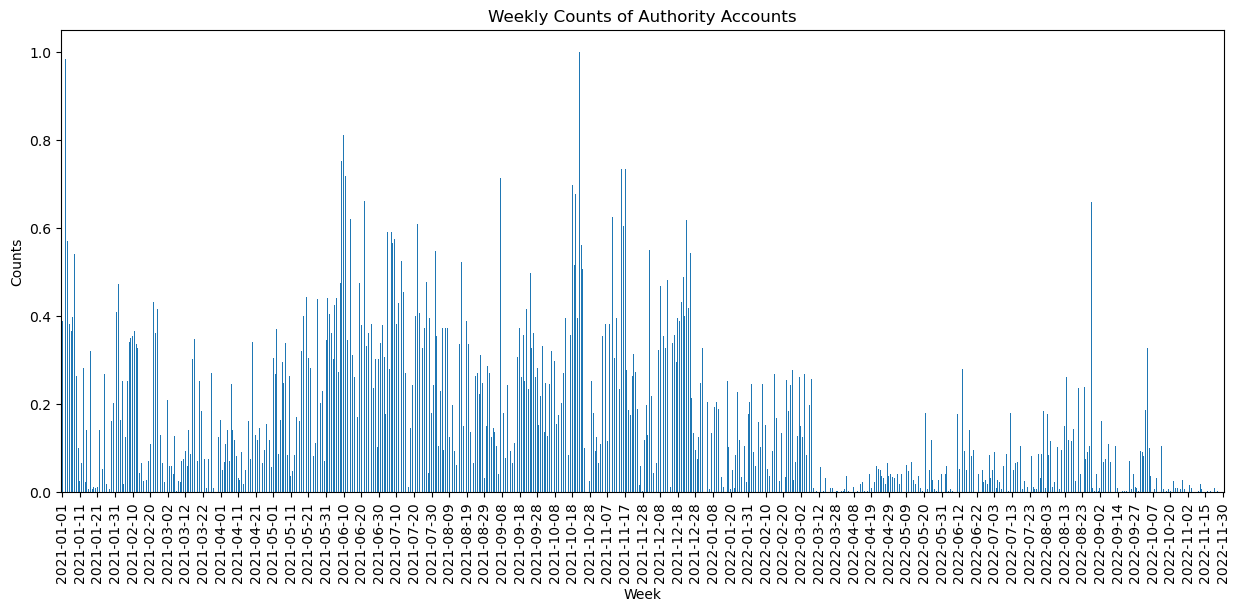

'2022-11-30'

In [79]:

authority_accounts = authority_accounts[authority_accounts['created_at'] <= '2022-12-01']
authority_weekly_counts = authority_accounts.groupby(['created_date']).size()

# minmax scale the weekly counts
authority_weekly_counts = (authority_weekly_counts - authority_weekly_counts.min()) / (authority_weekly_counts.max() - authority_weekly_counts.min())


# select last day of authority accounts
authority_last_day = authority_accounts['created_date'].max()

# plot the weekly counts of authority accounts
plt.figure(figsize=(15, 6))
authority_weekly_counts.plot(kind='bar')
# set the interval of x-axis
plt.xticks(np.arange(0, len(authority_weekly_counts), 10), authority_weekly_counts.index[::10])

plt.title('Weekly Counts of Authority Accounts')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.show()
# select last day of authority accounts
authority_last_day

(413376, 23)
(404055, 23)


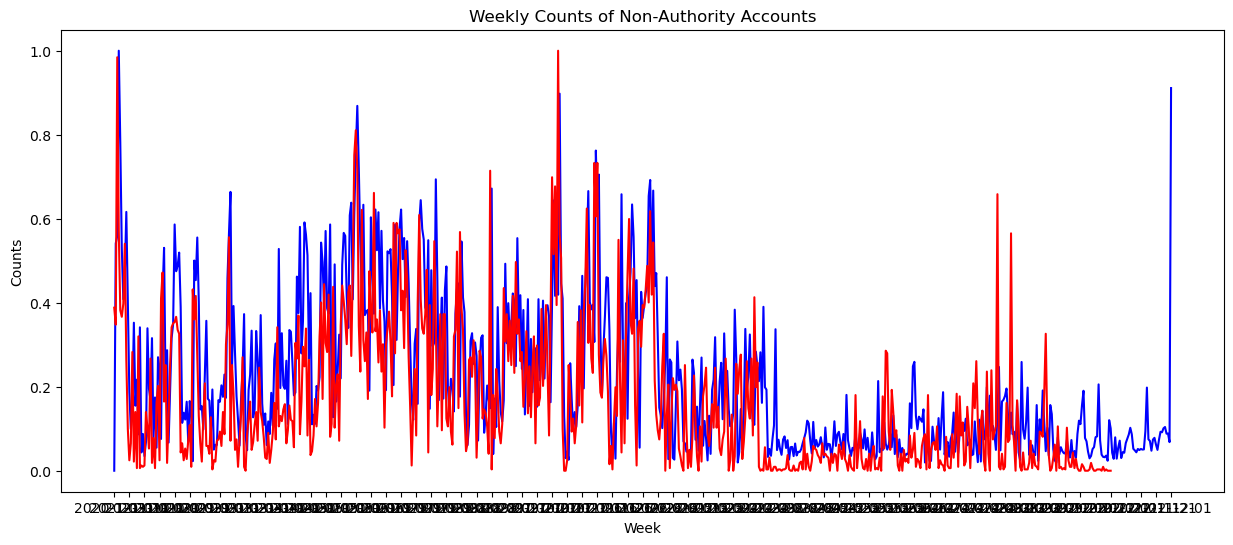

In [80]:
# select non-authority accounts
non_authority_accounts = data[~data['nick_name'].str.contains('|'.join(authority_keywords))]

#drop the row where date is after the last day of authority accounts
print(non_authority_accounts.shape)
non_authority_accounts = non_authority_accounts[non_authority_accounts['created_date'] <= '2022-12-01']
print(non_authority_accounts.shape)

non_authority_weekly_counts = non_authority_accounts.groupby(['created_date']).size()

# minmax scale the weekly counts
non_authority_weekly_counts = (non_authority_weekly_counts - non_authority_weekly_counts.min()) / (non_authority_weekly_counts.max() - non_authority_weekly_counts.min())

# plot the weekly counts of non-authority accounts
plt.figure(figsize=(15, 6))
non_authority_weekly_counts.plot(kind='line', color='blue')
authority_weekly_counts.plot(kind='line', color='red')

# set the interval of x-axis
plt.xticks(np.arange(0, len(non_authority_weekly_counts), 10), non_authority_weekly_counts.index[::10])


plt.title('Weekly Counts of Non-Authority Accounts')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.show()

In [83]:
# create a lag to authority_weekly_counts
authority_weekly_counts_lag = authority_weekly_counts.shift(1)

# calculate the correlation between non-authority and lag authority accounts
non_authority_weekly_counts.corr(authority_weekly_counts_lag)

0.6129361144401145

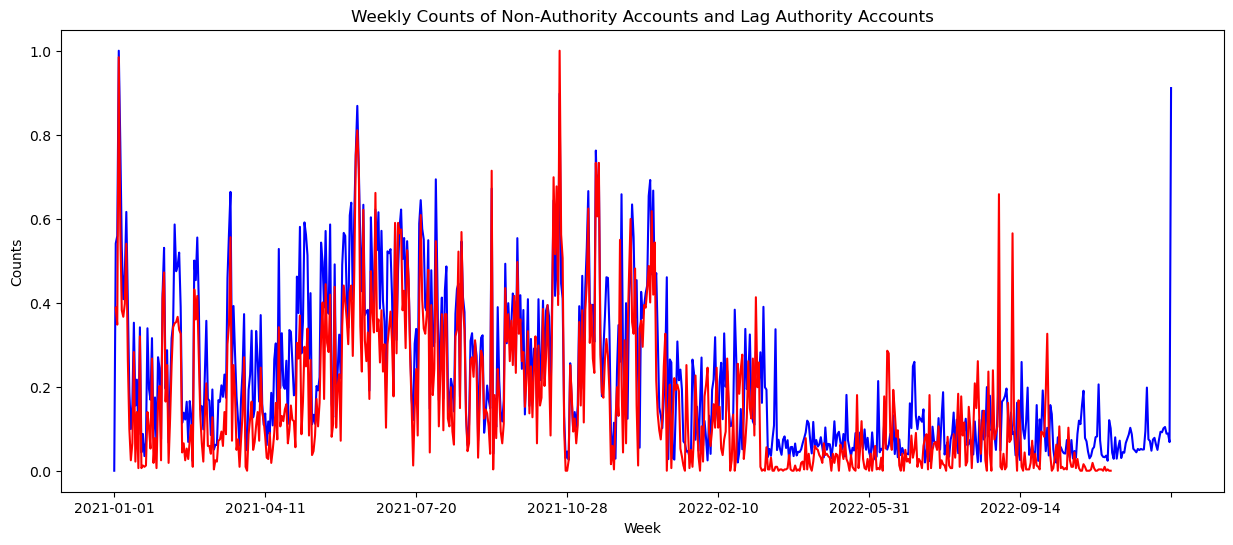

In [84]:
# plot the weekly counts of non-authority accounts and lag authority accounts
plt.figure(figsize=(15, 6))
non_authority_weekly_counts.plot(kind='line', color='blue')
authority_weekly_counts_lag.plot(kind='line', color='red')

plt.title('Weekly Counts of Non-Authority Accounts and Lag Authority Accounts')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.show()

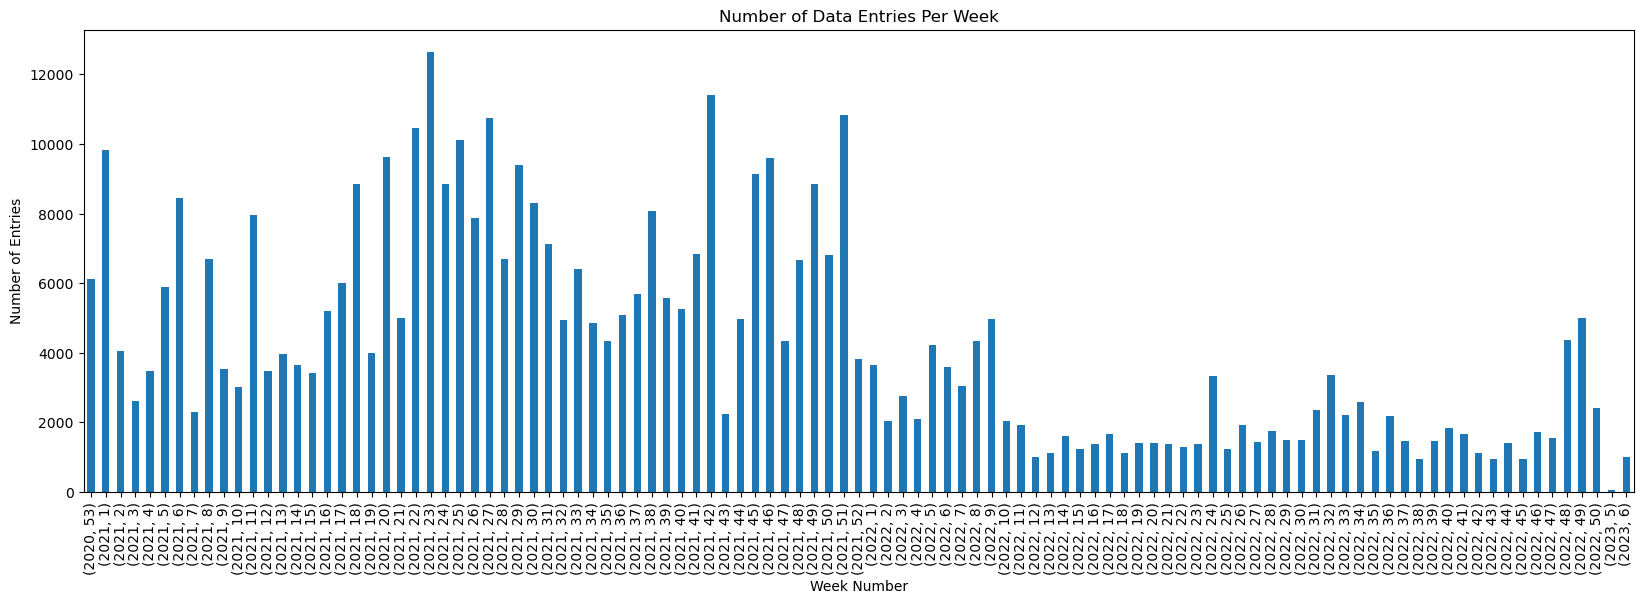

In [39]:
weekly_counts = data.groupby(['year', 'week']).size()

# Plot
plt.figure(figsize=(20, 6))
weekly_counts.plot(kind='bar')
plt.title('Number of Data Entries Per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Entries')
plt.show()
